<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 212: Data Science Programming I</h2>
<h3 style = "text-align:center">Assignment 4</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, May 31, 2020</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR NAME BELOW</h3>

### NAME: Prakhar Saxena


### A. Assignment Overview
This assignment provides the opportunity for you to practice with the capabilities of data wrangling in Python. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation. Text font size should be at least 11 points.

### F. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

For programming questions, 10% of the mark will be judged on the coding style. 

The following is a set of guidelines for the coding style in this course:
1. Write a good comments.
2. Your method comments must mention the purpose of each parameter, and must be grammatically correct. 
3. When breaking up a long line, break it before an operator, not after. 

### G. Data Sets

This assignment needs the data sets specified in the questions.

### H. Answer the following questions

#### Question 1:

Download the dataset: `loan-applications.csv` and load it into a data frame. The data set contains several hundreds of loan application data. This data set provides a glimse of what bank and insurance companies facing during their data analyses. The goal is to automate the loan application process based on applicants' information. This data set contains many features of applicants, including: `Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others`. The main problem is that the data set contains missing values and different types of data. Here, you are asked to write code to clean and visualize the data and answer the following questions:
1. List the number of missing values for each column.
2. Remove the applications each of which has more than 2 missing values.
3. Forward fill up the missing values for columns with Object data type.
4. Fill up the missing values with their means for columns with numerical data types.
5. After the above steps, show that there are no missing data in the DataFrame.
6. Plot the relationship between Education and ApplicantIncome.
7. Plot the relationship between Property_Area and Loan_Status.
8. Categorize the ApplicantIncome into low (0-2000), medium (2000-20000), High(20000-50000), and Rich(>50000).
9. Plot the relationship between Loan_Status and the categories of ApplicantIncome.
10. Categorize the CoapplicantIncome into low (0-2000), medium (2000-10000), High(10000-20000), and Rich(>20000).
11. Plot the relationship between Loan_Status and the categories of CoapplicantIncome. 
12. Develop plots to show the relationships between Load_Status and Education, Married, Credit_History. 
13. For all the columns with no-numerical data (except for Loan_ID), convert the values to numerical categorical representations.

In [1]:
# Write your code below


In [2]:
import pandas as pd
import numpy as np
from math import inf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('loan-applications.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# 1 List the number of missing values for each column.

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# 2 Remove the applications each of which has more than 2 missing values.

df = df.dropna(thresh=(len(df.columns)-2))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.dtypes[1]

dtype('O')

In [7]:
# 3 Forward fill up the missing values for columns with Object data type.

# and 

# 4 Fill up the missing values with their means for columns with numerical data types.

for c, dt in zip(df.columns, df.dtypes):
    if dt == df.dtypes[1]:
        df[c] = df[c].fillna(method='ffill') # write a loop through all attributes
    else:
        df[c] = df[c].fillna(df[c].mean())
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [8]:
# 5 After the above steps, show that there are no missing data in the DataFrame.

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<BarContainer object of 612 artists>

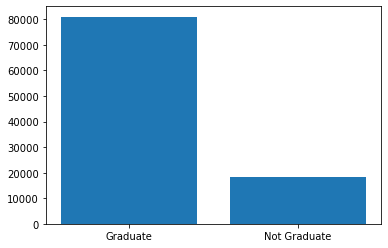

In [9]:
# 6 Plot the relationship between Education and ApplicantIncome.

plt.bar(df.Education, df.ApplicantIncome)

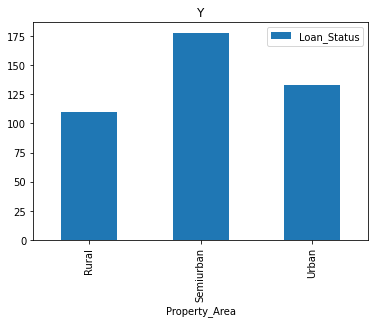

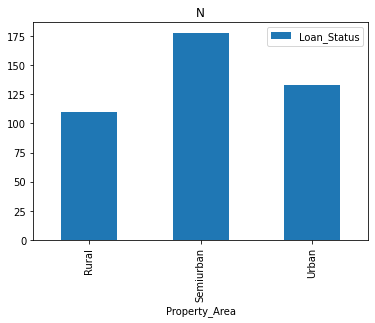

In [10]:
# 7 Plot the relationship between Property_Area and Loan_Status.

df_pl = df[['Property_Area', 'Loan_Status']]

df_y = df_pl.loc[df['Loan_Status'] == 'Y']
df_y = df_y.groupby('Property_Area').count()
df_y.plot(kind='bar', title='Y')

df_n = df_pl.loc[df['Loan_Status'] == 'N']
df_n = df_n.groupby('Property_Area').count()
df_y.plot(kind='bar', title='N')

In [11]:
# 8 Categorize the ApplicantIncome into low (0-2000), medium (2000-20000), High(20000-50000), and Rich(>50000)

df['ApplicantIncome'] = pd.cut(df['ApplicantIncome'], bins=[0, 2000, 20000, 50000, inf], include_lowest=True, labels=['low', 'medium', 'High', 'Rich'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,medium,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,medium,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,medium,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,medium,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,medium,0.0,141.000000,360.0,1.0,Urban,Y


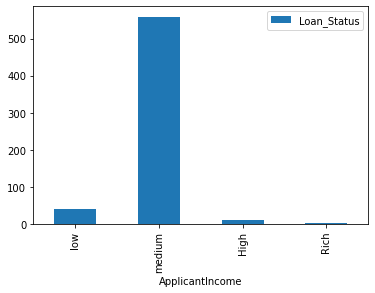

In [12]:
# 9 Plot the relationship between Loan_Status and the categories of ApplicantIncome.

df_li = df[['ApplicantIncome', 'Loan_Status']]
df_li = df_li.groupby('ApplicantIncome').count()
df_li.plot(kind='bar')

In [13]:
# 10 Categorize the CoapplicantIncome into low (0-2000), medium (2000-10000), High(10000-20000), and Rich(>20000).

df['CoapplicantIncome'] = pd.cut(df['CoapplicantIncome'], bins=[0, 2000, 10000, 20000, inf], include_lowest=True, labels=['low', 'medium', 'High', 'Rich'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,medium,low,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,medium,low,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,medium,low,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,medium,medium,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,medium,low,141.000000,360.0,1.0,Urban,Y


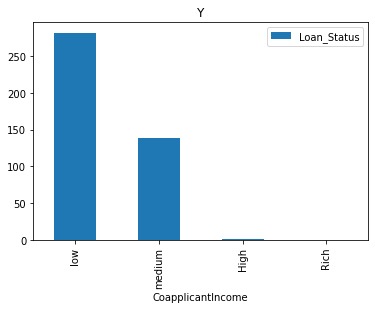

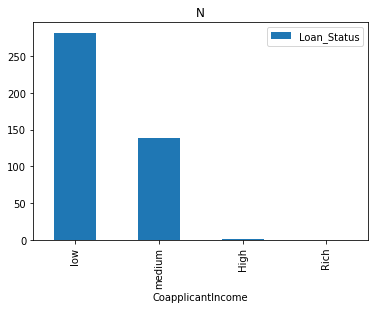

In [14]:
# 11 Plot the relationship between Loan_Status and the categories of CoapplicantIncome. 

df_lc = df[['CoapplicantIncome', 'Loan_Status']]

df_y = df_lc.loc[df['Loan_Status'] == 'Y']
df_y = df_y.groupby('CoapplicantIncome').count()
df_y.plot(kind='bar', title='Y')

df_n = df_lc.loc[df['Loan_Status'] == 'N']
df_n = df_n.groupby('CoapplicantIncome').count()
df_y.plot(kind='bar', title='N')

In [15]:
# 12 Develop plots to show the relationships between Loan_Status and Education, Married, Credit_History.


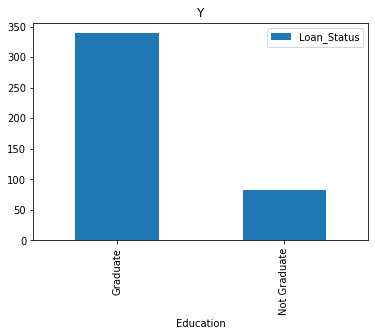

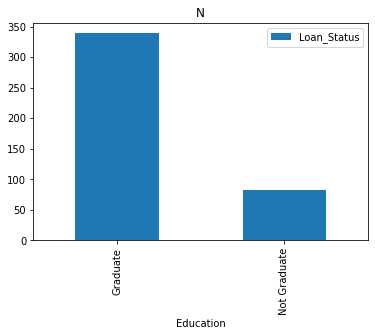

In [16]:
df_le = df[['Loan_Status', 'Education']]

df_y = df_le.loc[df_le['Loan_Status'] == 'Y']
df_y = df_y.groupby('Education').count()
df_y.plot(kind='bar', title='Y')

df_n = df_le.loc[df_le['Loan_Status'] == 'N']
df_n = df_n.groupby('Education').count()
df_y.plot(kind='bar', title='N')

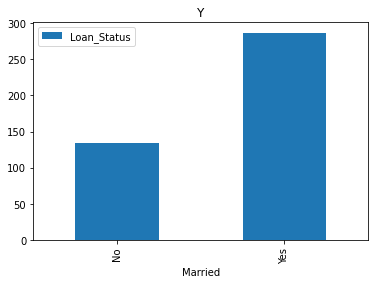

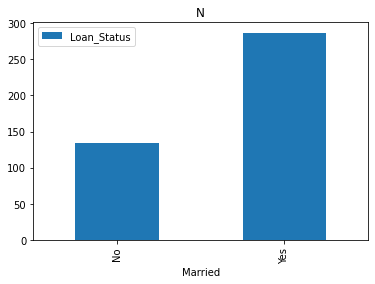

In [17]:
df_lm = df[['Loan_Status', 'Married']]

df_y = df_lm.loc[df_lm['Loan_Status'] == 'Y']
df_y = df_y.groupby('Married').count()
df_y.plot(kind='bar', title='Y')

df_n = df_lm.loc[df_lm['Loan_Status'] == 'N']
df_n = df_n.groupby('Married').count()
df_y.plot(kind='bar', title='N')

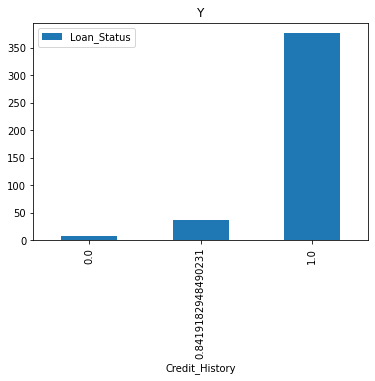

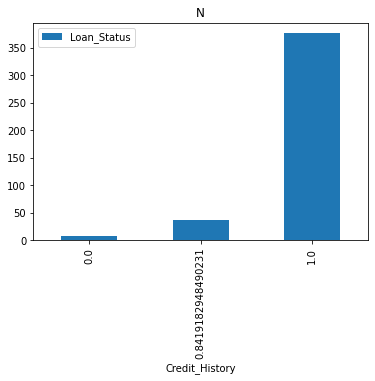

In [18]:
df_lc = df[['Loan_Status', 'Credit_History']]

df_y = df_lc.loc[df_lc['Loan_Status'] == 'Y']
df_y = df_y.groupby('Credit_History').count()
df_y.plot(kind='bar', title='Y')

df_n = df_lc.loc[df_lm['Loan_Status'] == 'N']
df_n = df_n.groupby('Credit_History').count()
df_y.plot(kind='bar', title='N')

#### Question 2:
Download the data set `imdb_1000.csv` and load it into a data frame. This data set contains rating information for about one thousand of movies. The following columns appear in the data set: `star_rating, title, content_rating, genre, duration, and actors_list`. Write code to clean and wrangle the data as instructed below:
- The actors_list column contains strings each of which should have three actor names. Extract the three actor names and add three new columns: `actor_1, actor_2, actor_3` in the data set. After the extraction, remove the column actors_list.

**Note**: There are sample kernels such as: [https://www.kaggle.com/pkabir/imdb-movies-text-data-cleaning](https://www.kaggle.com/pkabir/imdb-movies-text-data-cleaning) You can look at the existing kenerls to learn how other people accomplished. But your code must be different from existing ones. Plagiarism will not be tolerated as specified by Drexel Academic Honesty Rules and Procedures.

In [19]:
# Write your code below

import pandas as pd
df = pd.read_csv('imdb_1000.csv')

df.actors_list.replace(['\[', 'u\'','\'\]'],'', regex=True, inplace=True)
df.actors_list.replace('\',', ',', regex=True, inplace=True)

actors = pd.DataFrame(df.actors_list.str.split(',').tolist(), columns = ['actor_1','actor_2','actor_3'])

df = pd.concat([df, actors], axis=1, sort=False)
df = df.drop('actors_list', 1)
df

,star_rating,title,content_rating,genre,duration,actor_1,actor_2,actor_3
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,John Travolta,Uma Thurman,Samuel L. Jackson
...,...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,Dustin Hoffman,Jessica Lange,Teri Garr
975,7.4,Back to the Future Part III,PG,Adventure,118,Michael J. Fox,Christopher Lloyd,Mary Steenburgen
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,Russell Crowe,Paul Bettany,Billy Boyd
977,7.4,Poltergeist,PG,Horror,114,JoBeth Williams,"u""Heather O'Rourke""",Craig T. Nelson


<br>